In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("news_api_key")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [8]:
print(f"Total articles about Bitcoin: {btc_news['totalResults']}")

Total articles about Bitcoin: 4286


In [9]:
print(f"Total articles about Ethereum: {eth_news['totalResults']}")

Total articles about Ethereum: 917


In [10]:
# Create the Bitcoin sentiment scores DataFrame\
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text" ]
btc_df = btc_df[cols]

btc_df.head()


,compound,negative,neutral,positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [11]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text" ]
eth_df = eth_df[cols]

eth_df.head()


,compound,negative,neutral,positive,text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [12]:
eth_news

{'status': 'ok',
 'totalResults': 917,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Miller Kern',
   'title': 'Debunking Blockchain once and for all',
   'description': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20. When it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top …",
   'url': 'https://mashable.com/shopping/oct-20-blockchain-and-ethereum-programmer-online-courses/',
   'urlToImage': 'https://mondrian.mashable.com/2019%252F10%252F20%252F20%252Fd451f6dc63634e7ebc1a6884f0de511f.0108b.jpg%252F1200x630.jpg?signature=wXr1QUIZY8rWVXkvW6qxTgQk24E=',
   'publishedAt': '2019-10-20T09:00:00Z',
   'content': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise

In [13]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.414700,0.004789,0.931842,0.063368
std,0.249029,0.014509,0.034862,0.035556
min,-0.153100,0.000000,0.857000,0.000000
25%,0.333350,0.000000,0.927000,0.062500
50%,0.507000,0.000000,0.932000,0.068000
75%,0.516850,0.000000,0.937000,0.070500
max,0.816600,0.052000,1.000000,0.143000


In [14]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.252160,0.016100,0.928600,0.055350
std,0.338877,0.029755,0.058029,0.047744
min,-0.440400,0.000000,0.738000,0.000000
25%,0.000000,0.000000,0.913000,0.000000
50%,0.345350,0.000000,0.937500,0.054500
75%,0.464250,0.010500,0.952750,0.087000
max,0.690800,0.090000,1.000000,0.173000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))


sw.update([""])


In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    tokens = []
    doc = nlp(text)
    for word in doc:
        if word not in sw:
            tokens.append(lemmatizer.lemmatize(word.text.lower()))
    
    # Create a list of the words
    
    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return tokens


In [19]:
btc_df.insert(5,'tokens', " ")

In [20]:
btc_df

,compound,negative,neutral,positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,
5,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,
6,0.1725,0.052,0.882,0.066,Our robot colleague Satoshi Nakaboto writes ab...,
7,0.5530,0.000,0.926,0.074,Our robot colleague Satoshi Nakaboto writes ab...,
8,0.0000,0.000,1.000,0.000,Twitter and Square CEO Jack Dorsey has attende...,
9,0.5530,0.000,0.928,0.072,Our robot colleague Satoshi Nakaboto writes ab...,


In [21]:
regex = re.compile("[^a-zA-Z ]")

In [22]:
# Create a new tokens column for bitcoin
for x in range(0,len(btc_df)):
    tokens = []
    words = word_tokenize(btc_df['text'][x])
    for word in words:
        re_clean = regex.sub('', word)
        if re_clean not in sw:
            tokens.append(lemmatizer.lemmatize(re_clean.lower()))
    btc_df['tokens'][x] = tokens

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[le, two, mile, iceland, reykjavik, airport, s..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[at, least, idea, while, intensive, mining, bi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, dr, the, indepth, complete, blockchain, e..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."


In [24]:
eth_df.insert(5,'tokens', " ")

In [25]:
# Create a new tokens column for ethereum
for x in range(0,len(eth_df)):
    tokens = []
    words = word_tokenize(eth_df['text'][x])
    for word in words:
        re_clean = regex.sub('', word)
        if re_clean not in sw:
            tokens.append(lemmatizer.lemmatize(re_clean.lower()))
    eth_df['tokens'][x] = tokens
    
eth_df.head()    

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,compound,negative,neutral,positive,text,tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, dr, the, indepth, complete, blockchain, e..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, and, ..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[at, least, idea, while, intensive, mining, bi..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, picking, pace, since, inception, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
len(btc_df)

19

In [51]:
# Generate the Bitcoin N-grams where N=2

all_btc_tokens = []

for x in range(0,len(btc_df)):
    for y in btc_df['tokens'][x]:
        all_btc_tokens.append(y)

bigram_btc_counts = Counter(ngrams(all_btc_tokens, n=2))
bigram_btc_counts.most_common(10)


[(('satoshi', 'nakaboto'), 26),
 (('char', 'our'), 13),
 (('our', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'welcome'), 13)]

In [53]:
# Generate the Ethereum N-grams where N=2
all_eth_tokens = []

for x in range(0,len(eth_df)):
    for y in eth_df['tokens'][x]:
        all_eth_tokens.append(y)

bigram_eth_counts = Counter(ngrams(all_eth_tokens, n=2))
bigram_eth_counts.most_common(10)

[(('complete', 'blockchain'), 3),
 (('blockchain', 'ethereum'), 3),
 (('ethereum', 'programmer'), 3),
 (('programmer', 'bundle'), 3),
 (('dark', 'mode'), 3),
 (('platform', 'would'), 2),
 (('digital', 'currency'), 2),
 (('given', 'goahead'), 2),
 (('goahead', 'country'), 2),
 (('char', 'the'), 2)]

In [30]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Get the top 10 words for Bitcoin
Counter(all_btc_tokens).most_common(10)

[('bitcoin', 30),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('our', 13),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('day', 13)]

In [32]:
# Get the top 10 words for Ethereum
Counter(all_eth_tokens).most_common(10)

[('cryptocurrency', 9),
 ('bitcoin', 8),
 ('the', 6),
 ('blockchain', 6),
 ('ethereum', 5),
 ('i', 4),
 ('complete', 3),
 ('since', 3),
 ('a', 3),
 ('much', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [34]:
big_btc_string = " "

In [35]:
for x in range(0,len(all_btc_tokens)):
    big_btc_string += all_btc_tokens[x]
    big_btc_string += " "

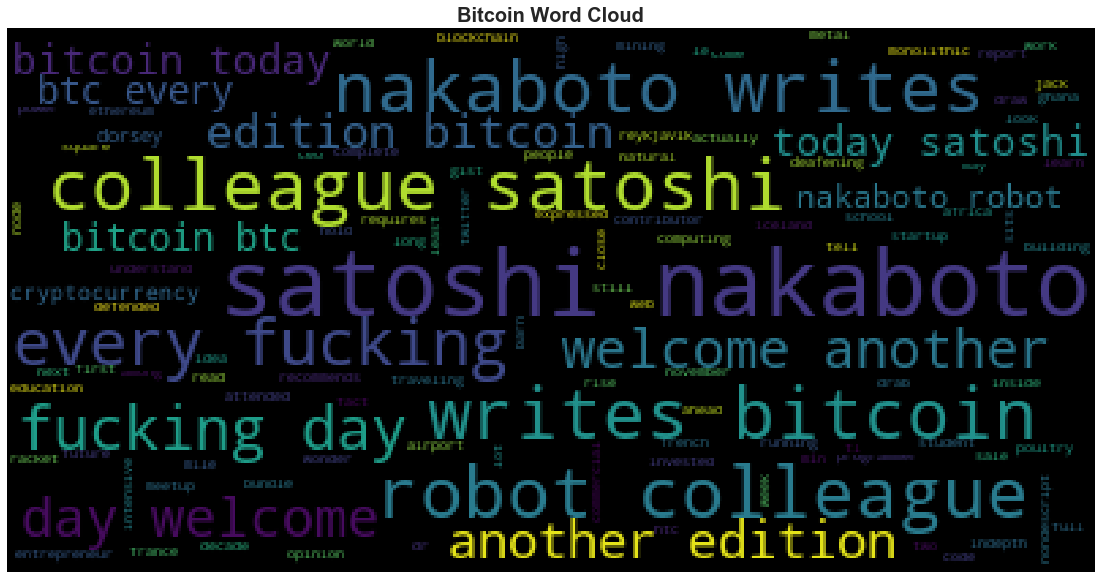

In [36]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(big_btc_string)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

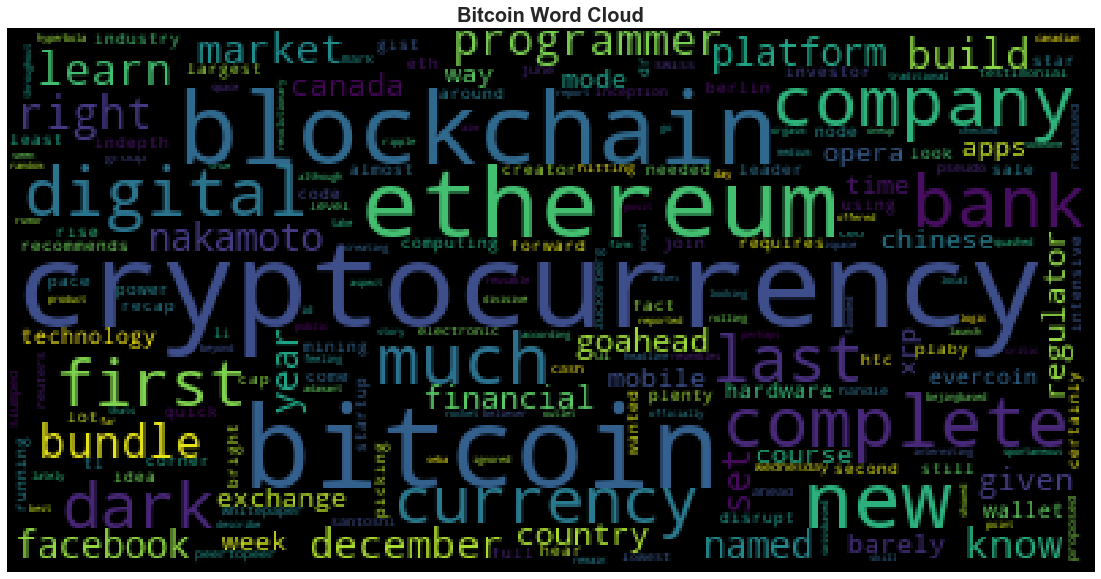

In [37]:
# Generate the Ethereum word cloud
big_eth_string = " "

for x in range(0,len(all_eth_tokens)):
    big_eth_string += all_eth_tokens[x]
    big_eth_string += " "
    
    
wc2 = WordCloud().generate(big_eth_string)
plt.imshow(wc2)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [41]:
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[le, two, mile, iceland, reykjavik, airport, s..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[at, least, idea, while, intensive, mining, bi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tl, dr, the, indepth, complete, blockchain, e..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[our, robot, colleague, satoshi, nakaboto, wri..."


## Bitcoin NER

In [42]:
# Concatenate all of the bitcoin text together
all_btc_text = ''

for x in range(0,len(btc_df)):
    all_btc_text += btc_df['text'][x]
    all_btc_text += ' '
    
all_btc_text    

"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars] TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Crypt

In [43]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"



In [44]:
# Render the visualization
displacy.render(doc, style='ent')

In [45]:
# List all Entities

print([ent.text for ent in doc.ents])

['Less than two miles', 'Reykjavik airport', 'tens of thousands', 'Bitcoin', 'HTC', 'France', 'first', 'The Next Web', 'French', 'Le Ministère de lÉducation Nationale', 'Complete Blockchain and Ethereum Programmer', 'just $24', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Baudriallard', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Isaac Newton', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Machiavelli', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Nietzsche', 'Time', 'Square', 'Jack Dorsey', 'Bitcoin', 'Ghana', 'just weeks', 'Dorsey', 'Bitcoin', 'Africa', 'Nigeria', 'Ghana', 'Mini', '+1911', 'Satoshi Nakaboto', 'Bitcoin BTC', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'the past 24 hours', 'Hegel', 'Satoshi Nakaboto', 'Bitco

In [46]:
doc.ents

(Less than two miles,
 Reykjavik airport,
 tens of thousands,
 Bitcoin,
 HTC,
 France,
 first,
 The Next Web,
 French,
 Le Ministère de lÉducation Nationale,
 Complete Blockchain and Ethereum Programmer,
 just $24,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 hours,
 Baudriallard,
 Satoshi Nakaboto,
 Bitcoin BTC,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 hours,
 Isaac Newton,
 Satoshi Nakaboto,
 Bitcoin BTC,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 hours,
 Machiavelli,
 Satoshi Nakaboto,
 Bitcoin BTC,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 hours,
 Nietzsche,
 Time,
 Square,
 Jack Dorsey,
 Bitcoin,
 Ghana,
 just weeks,
 Dorsey,
 Bitcoin,
 Africa,
 Nigeria,
 Ghana,
 Mini,
 +1911,
 Satoshi Nakaboto,
 Bitcoin BTC,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 hours,
 Hegel,
 Satoshi Nakaboto,
 Bitcoin BTC,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 the past 24 

---

## Ethereum NER

In [47]:
# Concatenate all of the bitcoin text together
all_eth_text = ''

for x in range(0,len(eth_df)):
    all_eth_text += eth_df['text'][x]
    all_eth_text += ' '
    
all_eth_text  

"TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars] Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars] At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars] he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\nEther

In [48]:
# Run the NER processor on all of the text
doc2 = nlp(all_eth_text)

# Add a title to the document
doc2.user_data["title"] = "Ethereum NER"

In [49]:
# Render the visualization
displacy.render(doc2, style='ent')

In [50]:
# List all Entities
doc2.ents

(Complete Blockchain and Ethereum Programmer,
 just $24,
 Bitcoin,
 Disrupt Berlin,
 December 11 and December 12,
 Bitcoin,
 HTC,
 second,
 the year 2009,
 Santoshi Nakamoto,
 Nakamoto,
 Bitcoin,
 Blockchai,
 Reuters,
 Bitcoin,
 as much as 9%,
 Wednesday,
 June,
 Facebook,
 Mark Zuckerberg's,
 Libra,
 Zuckerberg,
 Swiss,
 countrys,
 Swiss,
 Block,
 The Royal Bank of Canada,
 Last week,
 Canadian,
 The Royal Bank of Canada,
 Opera,
 one,
 Opera Mobile,
 the day,
 six,
 XRP,
 Bitcoin,
 XRP,
 third,
 Bitcoin,
 the Complete Blockchain and Ethereum Programmer Bundle,
 just $29,
 first,
 last week,
 Chinese,
 2021,
 first,
 last year,
 Chinese,
 Tencent,
 countrys,
 British Columbia,
 Canada,
 +2554,
 May 2016,
 San Francisco,
 Montgomery Street,
 Wells Fargo,
 two,
 The Complete Blockchain &amp,
 Ethereum Programmer Bundle,
 ten,
 eLearning,
 Ethereum,
 +2460,
 November,
 12, 2019,
 5,
 first,
 Bitcoin,
 Bitcoin,
 Ethereum,
 Facebook,
 Libra,
 Evercoin,
 Evercoin 2)